In [51]:
from selenium import webdriver as wb
from bs4 import BeautifulSoup as bs
from selenium.webdriver.common.keys import Keys
import time

## 이미지 크롤링

In [52]:
import os # 파일 시스템을 위한 라이브러리 ex) 파일, 폴더를 생성, 삭제, 존재 여부
from urllib.request import urlretrieve # 이미지 경로를 파일로 저장

In [3]:
#os.path.isdir('./이미지') # 존재 여부 ## dri == Directory 약자

False

In [5]:
#os.mkdir('./이미지') # 폴더 생성

FileExistsError: [WinError 183] 파일이 이미 있으므로 만들 수 없습니다: './이미지'

In [3]:
if not os.path.isdir('./이미지'): #'이미지' 폴더가 없다면 # 존재 여부 확인
    os.mkdir('./이미지') # '이미지' 폴더 생성

In [4]:
driver = wb.Chrome()
url = 'https://search.naver.com/search.naver?sm=tab_hty.top&where=image&query=%EC%BB%A4%ED%94%BC&oquery=%EC%95%84%EC%9D%B4%EC%9C%A0&tqi=hj1ixdp0YihssD8DmUhssssssEG-291664'
driver.get(url)

## 스크롤제어(50번) 해보기

In [5]:
body = driver.find_element_by_css_selector('body')

<ipython-input-5-05e4d09385de>:1: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  body = driver.find_element_by_css_selector('body')


In [6]:
for i in range(50): # 50번
    body.send_keys(Keys.PAGE_DOWN) # 페이지 다운
    time.sleep(0.5) ## 시간 간격 두기

In [7]:
soup = bs(driver.page_source, 'lxml')
img = soup.select('._image._listImage')

In [8]:
len(img)

545

In [9]:
img[0]['src']

'https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAyMTExMjRfMTkg%2FMDAxNjM3NzE5ODY5OTI2.j7RWE8gc3ZSw-FjKFcDwGZnuxM8m2yZbivZr2oCWgJAg.vn_hr4dysjTYC_A_j2ccM02ApBKXEPn6mIQVJ4OGjTQg.JPEG.bigbrogym1%2Fhgfhgf.jpg&type=a340'

In [10]:
img_list = []

for i in img:
    try: ## 저장 시 깨지는 이미지들은 'data-lazy-src' 속성이 있음 ## 따라서 'data-lazy-src'가 있으면 저장
        img_list.append(i['data-lazy-src'])
    except: ## 'data-lazy-src'이 없으면 src으로 저장
        img_list.append(i['src'])

In [11]:
len(img_list)

545

In [12]:
img_list

['https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAyMTExMjRfMTkg%2FMDAxNjM3NzE5ODY5OTI2.j7RWE8gc3ZSw-FjKFcDwGZnuxM8m2yZbivZr2oCWgJAg.vn_hr4dysjTYC_A_j2ccM02ApBKXEPn6mIQVJ4OGjTQg.JPEG.bigbrogym1%2Fhgfhgf.jpg&type=a340',
 'https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAyMTExMThfMTM5%2FMDAxNjM3MjA5ODA0NTAw.6A4XfWDa-pfq7-BzJFe1swp1eW3mCpWTpKM0IJiISb4g.p9uiB-0rXvxp-WdpMfMUkaEPC6fxCb0_GusaZvFJBkog.PNG.rlarkspalsu%2F4.png&type=a340',
 'https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAyMTExMjFfMTMy%2FMDAxNjM3NDgzNTA4NTE0.v-QJ6f8z7eUYdDHn1z2V-3y2THqWoPnhGwRjg_M2D0wg.3iOL8p4_5CUURGvmCx-FJX66FYss-yGdDiKjZQ-TJzUg.JPEG.limkh491986%2FIMG_1015.jpg&type=a340',
 'https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAyMTExMjZfMjQx%2FMDAxNjM3OTA5MTE4NDM5.6tvBwMVzOoSSxesib2F9VmsQJRrpyPbFwRW7zC40jP8g.H6SGzdwxcBC0vhQKJbwxum8Qe6nDpx8wH93ciQaOHpIg.JPEG.ms_choi91%2Foutput_2835756295.jpg&type=a340',
 'ht

## 이미지 파일로 저장

In [13]:
file_num = 0 # 파일명 : 0

In [14]:
img_list[0] ## 이미지 src속성값을 리스트로 생성

'https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAyMTExMjRfMTkg%2FMDAxNjM3NzE5ODY5OTI2.j7RWE8gc3ZSw-FjKFcDwGZnuxM8m2yZbivZr2oCWgJAg.vn_hr4dysjTYC_A_j2ccM02ApBKXEPn6mIQVJ4OGjTQg.JPEG.bigbrogym1%2Fhgfhgf.jpg&type=a340'

In [15]:
# urlretrieve(scr, 경로)
urlretrieve(img_list[0], './이미지/'+ str(file_num) + '.jpg') # 이미지 파일 1개 저장 # 경로 : ./이미지/0.jpg

('./이미지/0.jpg', <http.client.HTTPMessage at 0x2d487d7a040>)

In [16]:
file_num = 0 # 파일명 : 0

for i in range(len(img_list)): ## 범위 == 이미지 src속성값
    urlretrieve(img_list[i], './이미지/'+ str(file_num) + '.jpg') # 이미지 파일 1개 저장
    file_num += 1 # 파일명 +1 
    time.sleep(0.5) # 시간 텀 주기
    print('%s번째 이미지가 저장 중입니다.'%file_num) ## 출력문

1번째 이미지가 저장 중입니다.
2번째 이미지가 저장 중입니다.
3번째 이미지가 저장 중입니다.
4번째 이미지가 저장 중입니다.
5번째 이미지가 저장 중입니다.
6번째 이미지가 저장 중입니다.
7번째 이미지가 저장 중입니다.
8번째 이미지가 저장 중입니다.
9번째 이미지가 저장 중입니다.
10번째 이미지가 저장 중입니다.
11번째 이미지가 저장 중입니다.
12번째 이미지가 저장 중입니다.
13번째 이미지가 저장 중입니다.
14번째 이미지가 저장 중입니다.
15번째 이미지가 저장 중입니다.
16번째 이미지가 저장 중입니다.
17번째 이미지가 저장 중입니다.
18번째 이미지가 저장 중입니다.
19번째 이미지가 저장 중입니다.
20번째 이미지가 저장 중입니다.
21번째 이미지가 저장 중입니다.
22번째 이미지가 저장 중입니다.
23번째 이미지가 저장 중입니다.
24번째 이미지가 저장 중입니다.
25번째 이미지가 저장 중입니다.
26번째 이미지가 저장 중입니다.
27번째 이미지가 저장 중입니다.
28번째 이미지가 저장 중입니다.
29번째 이미지가 저장 중입니다.
30번째 이미지가 저장 중입니다.
31번째 이미지가 저장 중입니다.
32번째 이미지가 저장 중입니다.
33번째 이미지가 저장 중입니다.
34번째 이미지가 저장 중입니다.
35번째 이미지가 저장 중입니다.
36번째 이미지가 저장 중입니다.
37번째 이미지가 저장 중입니다.
38번째 이미지가 저장 중입니다.
39번째 이미지가 저장 중입니다.
40번째 이미지가 저장 중입니다.
41번째 이미지가 저장 중입니다.
42번째 이미지가 저장 중입니다.
43번째 이미지가 저장 중입니다.
44번째 이미지가 저장 중입니다.
45번째 이미지가 저장 중입니다.
46번째 이미지가 저장 중입니다.
47번째 이미지가 저장 중입니다.
48번째 이미지가 저장 중입니다.
49번째 이미지가 저장 중입니다.
50번째 이미지가 저장 중입니다.
51번째 이미지가 저장 중입니다.
52번째 이미지가 저장 중입니다.
53번째 이미지가 저장 중입니다.
54

417번째 이미지가 저장 중입니다.
418번째 이미지가 저장 중입니다.
419번째 이미지가 저장 중입니다.
420번째 이미지가 저장 중입니다.
421번째 이미지가 저장 중입니다.
422번째 이미지가 저장 중입니다.
423번째 이미지가 저장 중입니다.
424번째 이미지가 저장 중입니다.
425번째 이미지가 저장 중입니다.
426번째 이미지가 저장 중입니다.
427번째 이미지가 저장 중입니다.
428번째 이미지가 저장 중입니다.
429번째 이미지가 저장 중입니다.
430번째 이미지가 저장 중입니다.
431번째 이미지가 저장 중입니다.
432번째 이미지가 저장 중입니다.
433번째 이미지가 저장 중입니다.
434번째 이미지가 저장 중입니다.
435번째 이미지가 저장 중입니다.
436번째 이미지가 저장 중입니다.
437번째 이미지가 저장 중입니다.
438번째 이미지가 저장 중입니다.
439번째 이미지가 저장 중입니다.
440번째 이미지가 저장 중입니다.
441번째 이미지가 저장 중입니다.
442번째 이미지가 저장 중입니다.
443번째 이미지가 저장 중입니다.
444번째 이미지가 저장 중입니다.
445번째 이미지가 저장 중입니다.
446번째 이미지가 저장 중입니다.
447번째 이미지가 저장 중입니다.
448번째 이미지가 저장 중입니다.
449번째 이미지가 저장 중입니다.
450번째 이미지가 저장 중입니다.
451번째 이미지가 저장 중입니다.
452번째 이미지가 저장 중입니다.
453번째 이미지가 저장 중입니다.
454번째 이미지가 저장 중입니다.
455번째 이미지가 저장 중입니다.
456번째 이미지가 저장 중입니다.
457번째 이미지가 저장 중입니다.
458번째 이미지가 저장 중입니다.
459번째 이미지가 저장 중입니다.
460번째 이미지가 저장 중입니다.
461번째 이미지가 저장 중입니다.
462번째 이미지가 저장 중입니다.
463번째 이미지가 저장 중입니다.
464번째 이미지가 저장 중입니다.
465번째 이미지가 저장 중입니다.
466번째 이미지가 저장 중입니다.


In [76]:
## 안 깨진 이미지(== 저장이 제대로 된 이미지)
img[3]

<img alt="맥널티 커피머신 솔직후기! (+크레마 가득 에스프레소 뽑기까지☕️)" class="_image _listImage" data-org-height="331" data-org-width="340" src="https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAyMTExMjZfMjQx%2FMDAxNjM3OTA5MTE4NDM5.6tvBwMVzOoSSxesib2F9VmsQJRrpyPbFwRW7zC40jP8g.H6SGzdwxcBC0vhQKJbwxum8Qe6nDpx8wH93ciQaOHpIg.JPEG.ms_choi91%2Foutput_2835756295.jpg&amp;type=a340" style="height: 230px; opacity: 1;"/>

In [77]:
## 깨진 이미지(== 저장이 제대로 안된 이미지)
img[4]

<img alt="[전포 카페] 불스 커피, 바이요거사이드" class="_image _listImage" data-lazy-src="https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAyMTExMTlfMTI3%2FMDAxNjM3MzIzNTU4Mzgw.ekBz5eRIlJauREbNtDEj09JbO5DI_JozzmJ5B01xAZkg.ajt0vYUwaXOartofpayMf04il5rOum_8qN0zkIKZfBsg.JPEG.ds951216%2FIMG_4604.JPG&amp;type=a340" data-org-height="342" data-org-width="340" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" style="height: 237px;"/>

In [75]:
img_list[4]

'data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7'

## G마켓 베스트 크롤링

In [61]:
driver = wb.Chrome()
url = 'http://corners.gmarket.co.kr/Bestsellers'
driver.get(url)

In [39]:
## 방법1 : soup으로 데이터 추출시 제어 불가능, text값은 추출 가능
soup = bs(driver.page_source, 'lxml') # 셀레니움으로 파싱
img = soup.select('.lazy')

## 방법2 : driver로 데이터 추출시 제어 가능 
img = driver.find_element_by_css_selector('img.lazy')

img_list = []

## 이미지가 안 가져올 때를 위한 방법
for i in img: 
    try:
        img_list.append(i['data-original']) # src가 아닌 data-original 값이 있다면 이 주소 가져오기
    except:
        img_list.append(i['src']) # data-original값이 없다면 src 주소 가져오기
        # 이미지 파일 저장 
        
file_num = 0 # 파일명 : 0

for i in range(len(img_list)):
    urlretrieve(img_list[i], './이미지/'+ str(file_num) + '.jpg') 
    file_num += 1 # 이미지 하나씩 저장되면서 : 1,2,3...
    time.sleep(0.5) # 시간 텀 주기
    print('%s번째 이미지가 저장 중입니다.'%file_num) 

1번째 이미지가 저장 중입니다.
2번째 이미지가 저장 중입니다.
3번째 이미지가 저장 중입니다.
4번째 이미지가 저장 중입니다.
5번째 이미지가 저장 중입니다.
6번째 이미지가 저장 중입니다.
7번째 이미지가 저장 중입니다.
8번째 이미지가 저장 중입니다.
9번째 이미지가 저장 중입니다.
10번째 이미지가 저장 중입니다.
11번째 이미지가 저장 중입니다.
12번째 이미지가 저장 중입니다.
13번째 이미지가 저장 중입니다.
14번째 이미지가 저장 중입니다.
15번째 이미지가 저장 중입니다.
16번째 이미지가 저장 중입니다.
17번째 이미지가 저장 중입니다.
18번째 이미지가 저장 중입니다.
19번째 이미지가 저장 중입니다.
20번째 이미지가 저장 중입니다.
21번째 이미지가 저장 중입니다.
22번째 이미지가 저장 중입니다.
23번째 이미지가 저장 중입니다.
24번째 이미지가 저장 중입니다.
25번째 이미지가 저장 중입니다.
26번째 이미지가 저장 중입니다.
27번째 이미지가 저장 중입니다.
28번째 이미지가 저장 중입니다.
29번째 이미지가 저장 중입니다.
30번째 이미지가 저장 중입니다.
31번째 이미지가 저장 중입니다.
32번째 이미지가 저장 중입니다.
33번째 이미지가 저장 중입니다.
34번째 이미지가 저장 중입니다.
35번째 이미지가 저장 중입니다.
36번째 이미지가 저장 중입니다.
37번째 이미지가 저장 중입니다.
38번째 이미지가 저장 중입니다.
39번째 이미지가 저장 중입니다.
40번째 이미지가 저장 중입니다.
41번째 이미지가 저장 중입니다.
42번째 이미지가 저장 중입니다.
43번째 이미지가 저장 중입니다.
44번째 이미지가 저장 중입니다.
45번째 이미지가 저장 중입니다.
46번째 이미지가 저장 중입니다.
47번째 이미지가 저장 중입니다.
48번째 이미지가 저장 중입니다.
49번째 이미지가 저장 중입니다.
50번째 이미지가 저장 중입니다.
51번째 이미지가 저장 중입니다.
52번째 이미지가 저장 중입니다.
53번째 이미지가 저장 중입니다.
54

In [66]:
title_list = []
price_list = []
rank_list = []

img = driver.find_elements_by_css_selector('img.lazy') ## 방법2 : driver로 데이터 추출시 제어 가능 

for i in range(10): ## 클릭 반복
    img = driver.find_elements_by_css_selector('img.lazy')
    img[i].click()
    time.sleep(0.4)
    
    soup = bs(driver.page_source, 'lxml')
    title = soup.select_one('h1.itemtit') ## 하나만 필요하므로 select_one 사용
    price = soup.select_one('strong.price_real')
    
    title_list.append(title.text)
    price_list.append(price.text)
    rank_list.append(i+1)
    
    driver.back()
    time.sleep(0.4)

<ipython-input-66-6ebb6798126a>:5: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  img = driver.find_elements_by_css_selector('img.lazy') ## 방법2 : driver로 데이터 추출시 제어 가능
<ipython-input-66-6ebb6798126a>:8: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  img = driver.find_elements_by_css_selector('img.lazy')


In [67]:
print(len(title_list))
print(len(price_list))
print(len(rank_list))

10
10
10


## 태그 삭제

In [69]:
import requests as req

In [72]:
url = 'https://search.naver.com/search.naver?ie=UTF-8&sm=whl_hty&query=%EA%B4%91%EC%A3%BC%EB%82%A0%EC%94%A8' ## url == 광주날씨
res = req.get(url)
res ## <Response [200]> == 성공

<Response [200]>

In [77]:
soup = bs(res.text, 'lxml') ## 방법1 : 텍스트 추출을 위한 셀레니움으로 파싱
t = soup.select('div.temperature_text > strong')
t[0].text ## 페이지의 현재 온도만 가져오기

'현재 온도11°'

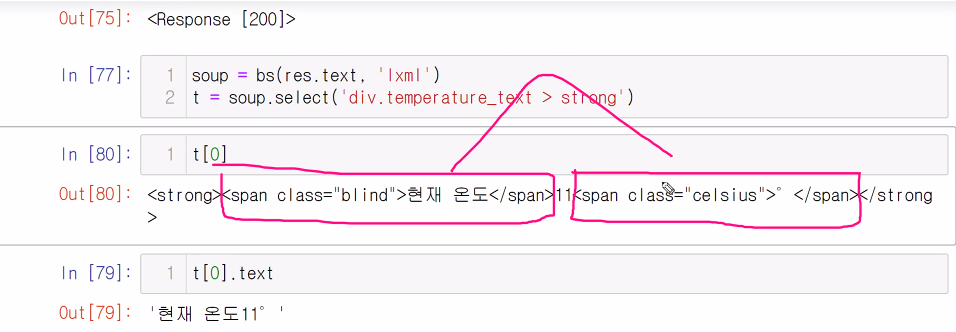

### extract() 태그삭제 함수

In [80]:
span = soup.select('div.temperature_text > strong > span')
span ## 삭제하기 위해 삭제할 태그 찾기

[<span class="blind">현재 온도</span>,
 <span class="celsius">°</span>,
 <span class="blind">예측 온도</span>,
 <span class="celsius">°</span>,
 <span class="blind">예측 온도</span>,
 <span class="celsius">°</span>,
 <span class="blind">예측 온도</span>,
 <span class="celsius">°</span>,
 <span class="blind">예측 온도</span>,
 <span class="celsius">°</span>]

In [82]:
for i in span:
    i.extract() ## 삭제

In [84]:
t = soup.select('div.temperature_text > strong')
t[0]

<strong>11</strong>

## 탭 전환

In [89]:
driver = wb.Chrome()
url = 'https://www.naver.com/'
driver.get(url)

In [90]:
soup = bs(driver.page_source, 'lxml')

In [92]:
print(driver.window_handles) # 탭 현황

['CDwindow-EC25F796DC4DA592CAD11C8E1C3925CC', 'CDwindow-F2612213B9D15F2A1E6EF39A772ADDE3', 'CDwindow-0E8EFAEE8750352000A960B0B8524040']


In [96]:
driver.switch_to.window('CDwindow-0E8EFAEE8750352000A960B0B8524040')

In [97]:
driver.quit() ## 크롬창 닫기

### 키보드, 마우스 제어

In [98]:
!pip install pyautogui

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for pyautogui: filename=PyAutoGUI-0.9.53-py3-none-any.whl size=36583 sha256=02d9fd07e295bb200eb62df91e4b5e58762e159559d5dfce3cd077f93ae21ffd
  Stored in directory: c:\users\smhrd\appdata\local\pip\cache\wheels\54\04\f7\55704a9d374ed923785a4fdc0ef00151fa25306b3b93345532
  Created wheel for pygetwindow: filename=PyGetWindow-0.0.9-py3-none-any.whl size=11078 sh

In [101]:
import pyautogui as py

In [104]:
time.sleep(2)
py.position() # 마우스 현재 위치

Point(x=1322, y=805)

In [105]:
py.moveTo(3215, 516) # 마우스 이동
py.click() # 마우스 클릭

In [107]:
py.click(3215, 516, button='right') # 마우스 좌표 클릭

In [111]:
py.click(3215, 516)
time.sleep(1)
py.hotkey('ctrl', 's') # 키 입력

In [112]:
py.doubleClick()